# Zajęcia 3 - regresja liniowa w ML 

## Przypomnienie - metoda najmniejszych kwadratów

W ogólności - mamy dane w postaci dwóch wektorów $x$ i $y$ o jednakowej długości, gdzie $x$ zawiera argument funkcji, a $y$ wartość funkcji dla tego argumentu. Innymi słowy można stworzyć pary $(x, y)$, które określają funkcję. Równie dobrze dane te przechować można w postaci macierzy 2D lub listy krotek. 

Dane są zdyskretyzowane - nie znamy matematycznego wyrazu opisującego funkcję. Naszym zadaniem jest znalezienie modelu najlepiej opisującego dane wartości lub sprawdzenie, czy zadany z góry model dobrze opisuje testowe dane.

Modelem może być dowolna funkcja zależna od dowolnej, ale określonej liczby parametrów, które oznaczane będą jako $c_i$, gdzie $i$ jest indeksem parametru. Liczba parametrów oznaczana jest jako $N$ Przykładowy modele:
- funkcja liniowa: $y(x) = c_1x+c_2$
- funkcja kwadratowa: $y(x) = c_1x^2 + c_2x + c_3$
- funkcja sinus/cosinus: $y(x) = c_1 \sin(c_2x + c_3) + c_4 $

Oczywiście modelem może być każda poprawna matematycznie funkcja. Na potrzeby uogólnione postaci załóżmy, że funkcja modelowa ma postać $f(x, c_1,c_2, \cdots, c_N)$.

Z wykorzystaniem metody najmniejszych kwadratów - minimalizowana jest odległość modelowej krzywej od wszystkich punktów:

$$ G = \sum_{i=1}^{N} [ y_i - f(x_i, c_1,c_2, \cdots, c_N) ]^2 $$

Minimalizacji powyżego wyrażenia można dokonać przyrównując pochodne wyrażenia po wszystkich parametrach do zera. Oczywiście - pierwsza pochodna mówi o ekstremum, które może być maksimum lub minimum funkcjonału $G$, ale w tym przypadku będziemy mieli do czynienia z minimum (maksimum tego funkcjonału to $+\inf$, ponieważ największa możliwa odległość dopasowanego modelu od punktów to $+\inf$). 

$$ min(G) = \frac{\delta G}{\delta c_i} = 0 $$

Otrzymany w ten sposób układ $N$ równań na $N$ parametrów pozwala jednoznacznie wyznaczyć optymalne parametry dopasowania zadanego modelu do posiadanych danych. 

Metoda najmniejszych kwadratów pozwala w łatwy sposób oszacowywać niepewności dopasowania, wyznaczając odchylenia standardowe parametrów. Dla dowolnego parametru oznaczonego jako $c_i$ jego odchylenie standardowe wyznaczyć można jako:

$$ S^2_{c_i} = \frac{1}{N} \sum_{k=1}^{N} \left( \frac{\delta c_i}{\delta y_k} \right) ^2 S_y^2, $$

gdzie: $ S^2_{y} = \frac{1}{N} \sum_{i=1}{N} [y_i - f(x_i, c_1, c_2, , \cdots, c_N)]^2$. Jednakże wartości współczynników $c_i$ nie są znane, tak więc trzeba skorzystać z ich estymatorów. Najlepszym estymatorem parametru $c_i$ jest w tym przypadku wartość parametru wyznaczona na podstawie dopasowania $N$ parametrów do zbioru składającego się z $K$ par $(x, y)$. W związku z tym skorzystać należy ze wzoru: 

$$ S^2_y = \frac{1}{K-N} \sum^K_{i=1} [y_i - f(x_i, c_1, c_2, \cdots, c_n)]^2. $$ 

Kowariancję par współczynników wyznacz się jako:

$$ C_{c_i, c_j} = \sum^N_{k=1}  \frac{\delta c_i}{\delta y_k} \frac{\delta c_j}{\delta y_k} S_y^2.   $$


## Regresja liniowa

Szczególnym, najprostszym przypadkiem regresji jest regresja liniowa, a więc dopasowanie liniowego modelu do danych. Model ma postać $ y = ax + b $.

Funkcjonał $G$ przyjmuje wtedy postać:

$$ G(a,b) = \sum_{i=1}^N (y_i - ax_i - b)^2. $$

Wyznaczamy pochodne cząstkowe funkcjonału $G(a,b)$ po parametrach $a$ i $b$, a następnie przyrównujemy je do zera

$$ \frac{\delta G}{\delta a} = - 2 \sum_{i=1}^N x_i(y_i - ax_i - b) = 0$$
$$ \frac{\delta G}{\delta b} = - 2 \sum_{i=1}^N (y_i - ax_i - b) = 0$$

i w wyniku otrzymujemy układ dwóch równań na dwie niewiadome. Rozwiązując go, wyznaczamy wartości parametrów $a$ i $b$ najlepiej pasujących do naszego modelu:

$$ a = \frac{N\sum_{i=1}^N x_iy_i - \left( \sum_{i=1}^N x_i \right) \left( \sum_{i=1}^N y_i \right) }{N \sum_{i=1}^{N} x_i^2 - \left( \sum_{i=1}^N x_i \right)^2}$$

$$ b = \frac{\left( \sum_{i=1}^N x_i^2\right) \left( \sum_{i=1}^N y_i \right) - \left( \sum_{i=1}^N x_i\right) \left( \sum_{i=1}^{N} x_i y_i\right)}{ N\sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2} $$

$S_y^2$ będzie w tym przypadku wyrażone wzorem: $S_y^2 = \frac{1}{N-2} \sum_{i=1}^N \left( y_i - ax_i - b \right)^2 $ . Dodatkowo, dla uproszczenia dalszych zapisów przyjąć można oznaczenie $ d_i = y_i - ax_i - b $. Wyznaczamy dwa parametry, więc liczba stopni swobody w tym przypadku wynosi $2$.

Odchylenia standardowe wyznaczonych parametrów $a$ i $b$ dopasowania są więc następujące:

$$ S_a^2 = \frac{ N \sum_{i=1}^N d_i^2}{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right]} $$

$$ S_b^2 = \frac{ N \left( \sum_{i=1}^N d_i^2 \right) \left( \sum_{i=1}^N x_i^2 \right) }{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right]} $$

Kowariancję dopasowanych parametrów $a$ i $b$ wyrażamy jako:

$$ C_{a,b} = - \frac{ \left( \sum_{i=1}^N d_i^2 \right) \left( \sum_{i=1}^N x_i \right) }{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right] } $$

Ostateczne niepewności dopasowanej prostej wyznacza się jako odcylenia standarowe $\hat{x}$ i $\hat{y}$, gdzie $\hat{x} = \frac{y-b}{a}$ i $\hat{y}=ax + b$.

$$ S_{\hat{y}}^2 = x^2S_a^2 + S_b^2 + 2xC_{a,b}$$
$$ S_{\hat{x}}^2 = \left( \frac{y-b}{a^2} \right) ^2 S_a^2 + \left( \frac{1}{a} \right) ^2 S_b^2 + 2 \frac{y-b}{a^2} \frac{1}{a} C_{a,b} $$

Wartości te służą do oznaczenia przedziału ufności dopasowania i mogą zostać wykorzystane do graficznego przedstawienia niepewności dopasowania na wykresie.


UWAGA!!! Polecam każdemu z Państwa policzyć sobie pochone "na kartce" i wyprowadzić powyższe wzory na podstawie ogólnych wyrażeń z rozdziału "Przypomnienie - metoda najmniejszych kwadratów"

## Regresja w języku Python

[  0.           1.01010101   2.02020202   3.03030303   4.04040404
   5.05050505   6.06060606   7.07070707   8.08080808   9.09090909
  10.1010101   11.11111111  12.12121212  13.13131313  14.14141414
  15.15151515  16.16161616  17.17171717  18.18181818  19.19191919
  20.2020202   21.21212121  22.22222222  23.23232323  24.24242424
  25.25252525  26.26262626  27.27272727  28.28282828  29.29292929
  30.3030303   31.31313131  32.32323232  33.33333333  34.34343434
  35.35353535  36.36363636  37.37373737  38.38383838  39.39393939
  40.4040404   41.41414141  42.42424242  43.43434343  44.44444444
  45.45454545  46.46464646  47.47474747  48.48484848  49.49494949
  50.50505051  51.51515152  52.52525253  53.53535354  54.54545455
  55.55555556  56.56565657  57.57575758  58.58585859  59.5959596
  60.60606061  61.61616162  62.62626263  63.63636364  64.64646465
  65.65656566  66.66666667  67.67676768  68.68686869  69.6969697
  70.70707071  71.71717172  72.72727273  73.73737374  74.74747475
  75.7575757

Text(0, 0.5, 'Y')

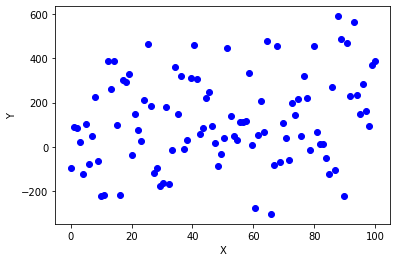

In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt

x = np.linspace(0, 100, 100)
a = ( np.random.rand() - 0.5 ) * 20          # losowa wartość a z zakresu [-10, 10]
b = ( np.random.rand() - 0.5) * 2* math.pi   # losowa wartość b z zakresu [-pi, pi]

y = a*x+b + np.random.normal(50, 200, 100)    # wartości y=ax+b z dodatkowym szumem o 
                                              # rozkładzie normalnym o średniej 50 i odchyleniu standowym 200

print(x)
print(y)

plt.plot(x, y, 'bo')
plt.xlabel("X")
plt.ylabel("Y")


### numpy - polyfit, czyli dopasowanie wielomianu n-tego stopnia

[ 1.5183256  46.14930343]


Text(0, 0.5, 'y')

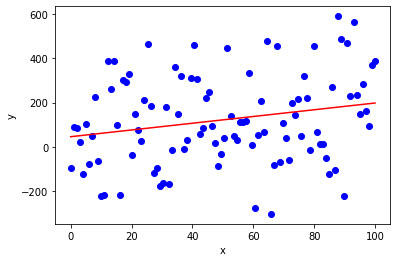

In [4]:
fit = np.polyfit(x, y, 1)  # dopasowujemy wielomian 1-go stopnia
print(fit)

fitted_a = fit[0]
fitted_b = fit[1]

fitted_y = fitted_a * x + fitted_b

plt.plot(x, y, "bo", x, fitted_y, "r-")
plt.xlabel("x")
plt.ylabel("y")

Średnia z residuuów: 0


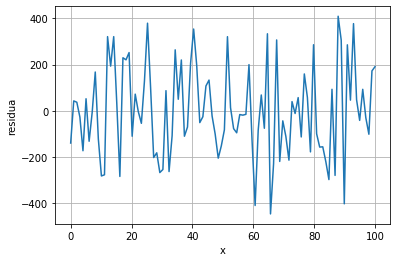

In [5]:
residuals = y - fitted_y
print("Średnia z residuuów: %d" % (np.mean(residuals)))

plt.plot(x, residuals)
plt.xlabel('x')
plt.ylabel("residua")
plt.grid(True)

### numpy.polyfit - niepewność dopasowania

Mamy możliwość zwrócenia macierzy kowariancji parametrów z wykonanego dopasowania.

Odchylenia standardowe parametrów $a$ i $b$ dopasowania to pierwiastek ze zdiagonalizowanej macierzy kowariancji:

$$ S = \sqrt{diag(cov)} $$

In [6]:
fit, cov = np.polyfit(x, y, 1, cov=True)  # dopasowujemy wielomian 1-go stopnia i żądamy zwrócenia macierzy kowariancji
print(fit)

fitted_a = fit[0]
fitted_b = fit[1]

uncertainty = np.sqrt(np.diag(cov))

print( "Wartość parametru a = %d" % fitted_a )
print( "Niepewność parametru a = %d" % uncertainty[0] )
print( "Wartość parametru b = %d" % fitted_b )
print( "Niepewność parametru b  = %d" % uncertainty[1] )

[ 1.5183256  46.14930343]
Wartość parametru a = 1
Niepewność parametru a = 0
Wartość parametru b = 46
Niepewność parametru b  = 39


### scipy - dopasowanie krzywej wraz z niepewnościami

Wartość parametru a = 1
Niepewność parametru a = 0
Wartość parametru b = 46
Niepewność parametru b  = 39


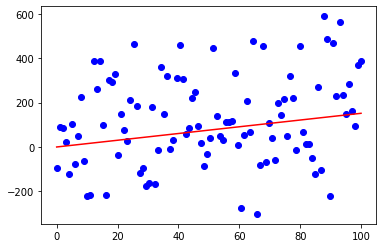

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a, b):
    return a*x + b

fit_sp, cov_sp = curve_fit(f, x, y)

a_fit = fit_sp[0]
b_fit = fit_sp[1]

uncertainty_sp = np.sqrt(np.diag(cov_sp))

print( "Wartość parametru a = %d" % a_fit )
print( "Niepewność parametru a = %d" % uncertainty_sp[0] )
print( "Wartość parametru b = %d" % b_fit )
print( "Niepewność parametru b  = %d" % uncertainty_sp[1] )

plt.plot(x, y, 'bo', x, a_fit*x+b, 'r-')


## Regresja w Data Mining

### Multiple Linear Regression (MLR)

MLP jest standardowo stosowaną metodą do dopasowania modelu do danych treningowych. Zakłada ona, że posiadamy treningowy zbiór wartości (np. wyodrębniony z całego zbioru danych) i na jego podstawie uczymy model odpowiednich parametrów, a następnie aplikujemy model z wyuczonymi parametrami na zbiorze testowym. Funkcja regresji ma postać $f(X, w) = X^Tw + w_0$. Algorytm zakłada minimalizację funkcję strat na zbiorze treningowym $\{X_i, y_i\}^N_{i=1}$:

$$ L(y, f(X, w)) = \sum_{i=1}^N || y_i - X_iw - w_0 ||^2, $$

gdzie $w$ jest nachyleniem prostej a $w_0$ przecięciem wykresu z osią Y. Są to więc parametry, które mają zostać dopasowane.

MLP zakłada następujące kroki działania:

1. Podział zbioru danych na zbiór treningowy i zbiór testowy}
2. Dopasowanie MLP do zbioru treningowego
3. Wykorzystanie parametrów do opisania zbioru testowego
4. Ocena jakości dopasowania
5. Wizualizacja wyników

Jakość dopasowania jest w tym przypadku określana poprzez następujące parametry:

1. Błąd średniokwadratowy RMSE (ang. Root Mean Squared Error):

$$ RMSE = \sqrt{ \frac{\sum_{i=1}^N (\hat{y}_i - y_i)^2}{N}},$$

gdzie: $N$ - liczba próbek w zbiorze testowym, $\hat{y}_i$ - wartość dopasowanej modelowej funkcji dla $i-tego$ parametru, $y_i$ - wartość dla $i-tego$ parametru w zbiorze testowym.

2. Współczynnik determinacji $R^2$ (R-squared):

$$ R^2 = \frac{\sum_{i=1}^{N} (\hat{y}_i - \bar{y} )^2}{ \sum_{i=1}^{N} (y_i - \bar{y} )^2}, $$

gdzie : $\bar{y}_i$ to wartość średnia wartości w zbiorze testowym.

W związku z tym - dążymy do mimimalizacji błędu średniokwadratowego i maksymalizacji współczynnika determinacji. RMSE powinien być jak nabardziej bliski zeru, a R-squared jak najbardziej bliski jedności.

#### Krok 1 - podział zbioru na dwie części

In [8]:
import random 
import math

train_len = math.floor(0.25 * len(x))
test_len = len(x) - train_len

# w przypadku danych, które wcześniej wygenerowaliśmy to zadziała poprawnie, 
# ale w ogólności lepiej nie wybierać zbyt długich ciągów, a dane przetasować

#X_train = x[:-numTest]
#X_test = x[-numTest:]
#Y_train = y[:-numTest]
#Y_test = y[-numTest:]

# tak będzie zdecydowanie bardziej miarodajnie

#X_train = random.choices(x, k=train_len) # tutaj mogą być powtórzenia
X_train = random.sample(np.array(x).tolist(), train_len) # a tutaj powtórzeń nie będzie
X_train.sort()
indexes = [x.tolist().index(s) for s in x if s in X_train ]
Y_train = y[indexes]

X_test = [s for s in x if s not in X_train]
indexes = [x.tolist().index(s) for s in x if s not in X_train ]
Y_test = y[indexes]

# na koniec powróćmy do numpy.array, bo przecież konwertowaliśmy wszystko na zwykłe listy (krok niekonieczny)

X_train = np.array(X_train) 
y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

#### Krok 2 - Dopasowanie modelu liniowego do danych treningowych

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regression = linear_model.LinearRegression() #stworzenie modelu liniowego
regression.fit(X_train.reshape(-1, 1), Y_train) # X.reshape(-1, 1), ponieważ mamy jedną cechę w zbiorze (docsy linerar_model.LinearRegression)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Krok 3 - zastosowanie nauczonego modelu do danych testowych

In [10]:
y_oszacowanie = regression.predict(X_test.reshape(-1, 1))

#### Krok 4 - Ocena jakości dopasowania danych testowych do modelu wyznaczonego na podstawie zbioru treningowego

Błąd średniokwadratowy (RMSE) = 189.6803
R-squared = 0.0482


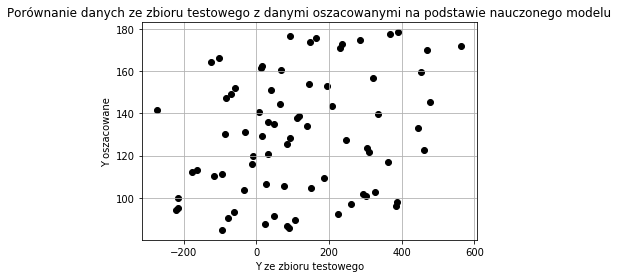

In [11]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_oszacowanie, color='black')
plt.title('Porównanie danych ze zbioru testowego z danymi oszacowanymi na podstawie nauczonego modelu')
plt.xlabel('Y ze zbioru testowego')
plt.ylabel('Y oszacowane')
plt.grid(True)

# Ewaluacja modelu
print("Błąd średniokwadratowy (RMSE) = %.4f" % np.sqrt(mean_squared_error(Y_test, y_oszacowanie)))
print('R-squared = %.4f' % r2_score(Y_test, y_oszacowanie))

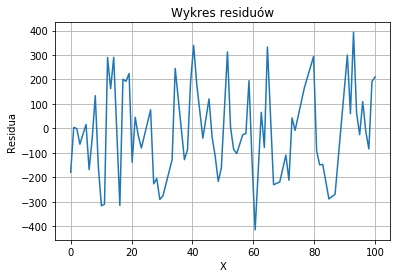

In [12]:
plt.plot(X_test, Y_test - y_oszacowanie)
plt.title("Wykres residuów")
plt.xlabel("X")
plt.ylabel("Residua")
plt.grid(True)

#### Krok 5 - postprocessing

Nachylenie =  0.9371846746818646
Przecięcie z osią Y =  84.73912626760202


Text(0, 0.5, 'y')

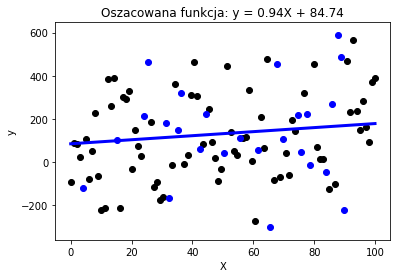

In [13]:
print('Nachylenie = ', regression.coef_[0])
print('Przecięcie z osią Y = ', regression.intercept_)

plt.scatter(X_test, Y_test,  color='black')
plt.scatter(X_train, Y_train, color="blue")
plt.plot(X_test, y_oszacowanie, color='blue', linewidth=3)
titlestr = 'Oszacowana funkcja: y = %.2fX + %.2f' % (regression.coef_[0], regression.intercept_)
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

### Wpływ korelacji na wyniki dopasowania

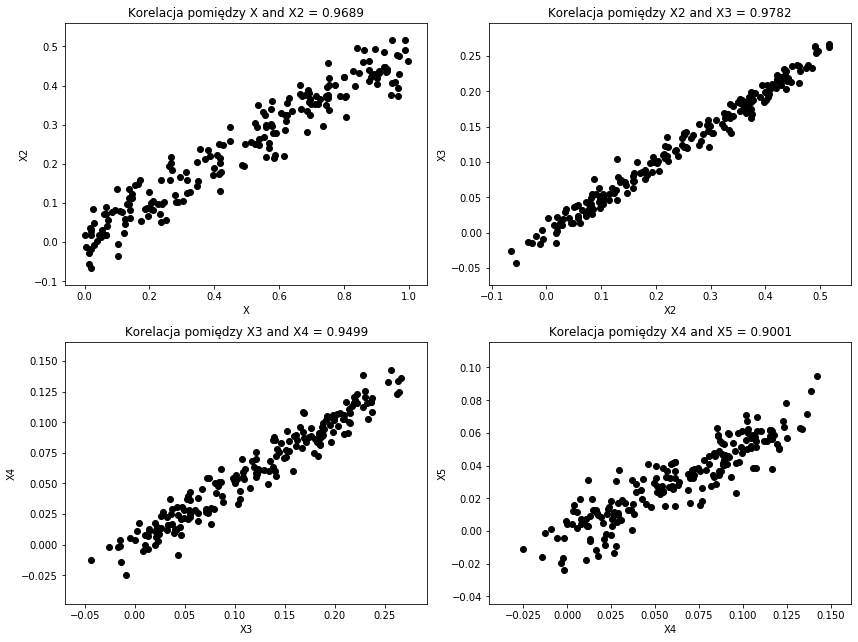

In [14]:
seed = 1
numInstances = 200
numTrain = 20   # number of training instances
numTest = numInstances - numTrain

np.random.seed(seed)
X = np.random.rand(numInstances,1).reshape(-1,1)
y_true = -3*X + 1 
y = y_true + np.random.normal(size=numInstances).reshape(-1,1)

X2 = 0.5*X + np.random.normal(0, 0.04, size=numInstances).reshape(-1,1)
X3 = 0.5*X2 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X4 = 0.5*X3 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X5 = 0.5*X4 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T)
titlestr = 'Korelacja pomiędzy X and X2 = %.4f' % (c[0,1])
ax1.set_title(titlestr)

ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T)
titlestr = 'Korelacja pomiędzy X2 and X3 = %.4f' % (c[0,1])
ax2.set_title(titlestr)

ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
titlestr = 'Korelacja pomiędzy X3 and X4 = %.4f' % (c[0,1])
ax3.set_title(titlestr)

ax4.scatter(X4, X5, color='black')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c = np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).T)
titlestr = 'Korelacja pomiędzy X4 and X5 = %.4f' % (c[0,1])
ax4.set_title(titlestr)

plt.tight_layout(pad=1.0)

Stwórzmy teraz silnie skorelowane zbiory i podzielmy je na zbiory treningowe i testowe. Niech zbiory oznaczone jako X_trainN mają N skorelowanych ze sobą zmiennych.

Następnie przeprowadźmy procedurę nauczenia modeli liniowych na tak skonstruowanych zbiorach i sprawdźmy jak dobrze lub jak źle opisują one dane testowe.

In [15]:
X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))
X_train5 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest]))
X_test5 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:]))

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train)

regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train)

regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train)

regr5 = linear_model.LinearRegression()
regr5.fit(X_train5, y_train)

y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
y_pred_train2 = regr2.predict(X_train2)
y_pred_test2 = regr2.predict(X_test2)
y_pred_train3 = regr3.predict(X_train3)
y_pred_test3 = regr3.predict(X_test3)
y_pred_train4 = regr4.predict(X_train4)
y_pred_test4 = regr4.predict(X_test4)
y_pred_train5 = regr5.predict(X_train5)
y_pred_test5 = regr5.predict(X_test5)

Aby ułatwić interpretowanie danych stwórzmy DataFrame z podsumowaniem - wyznaczymy błąd treningowy, błąd testowy i sumę wag absolutnych dla dopasowanych parametrów.

Wagi te zdefiniowane są jako $ \sum_{i=0}^N |w_i| $, gdzie $N$ jest liczbą szacowanych atrubutów.

,Model,Błąd treningowy,Błąd testowy,Suma wag absolutnych
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,0.03 X + -6.86 X2 + 1.12,0.868668,1.098603,8.004178
2,0.05 X + -6.14 X2 + -1.49 X3 + 1.12,0.868454,1.100347,8.796458
3,0.07 X + -6.23 X2 + -1.87 X3 + 1.12 X4 + 1.11,0.868395,1.099760,10.404153
4,0.22 X + -6.42 X2 + -2.47 X3 + 0.06 X4 + 3.51 ...,0.868060,1.105485,13.793117


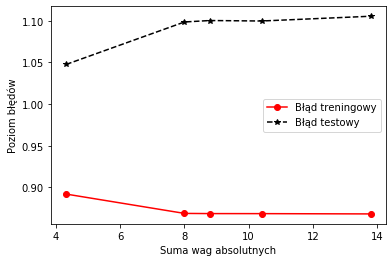

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Model', 'Błąd treningowy', 'Błąd testowy', 'Suma wag absolutnych']
model1 = "%.2f X + %.2f" % (regr.coef_[0][0], regr.intercept_[0])
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(regr.coef_[0]).sum() + np.absolute(regr.intercept_[0])]

model2 = "%.2f X + %.2f X2 + %.2f" % (regr2.coef_[0][0], regr2.coef_[0][1], regr2.intercept_[0])
values2 = [ model2, np.sqrt(mean_squared_error(y_train, y_pred_train2)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test2)),
           np.absolute(regr2.coef_[0]).sum() + np.absolute(regr2.intercept_[0])]

model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (regr3.coef_[0][0], regr3.coef_[0][1], 
                                                regr3.coef_[0][2], regr3.intercept_[0])
values3 = [ model3, np.sqrt(mean_squared_error(y_train, y_pred_train3)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test3)),
           np.absolute(regr3.coef_[0]).sum() + np.absolute(regr3.intercept_[0])]

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (regr4.coef_[0][0], regr4.coef_[0][1], 
                                        regr4.coef_[0][2], regr4.coef_[0][3], regr4.intercept_[0])
values4 = [ model4, np.sqrt(mean_squared_error(y_train, y_pred_train4)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test4)),
           np.absolute(regr4.coef_[0]).sum() + np.absolute(regr4.intercept_[0])]

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (regr5.coef_[0][0], 
                                        regr5.coef_[0][1], regr5.coef_[0][2], 
                                        regr5.coef_[0][3], regr5.coef_[0][4], regr5.intercept_[0])
values5 = [ model5, np.sqrt(mean_squared_error(y_train, y_pred_train5)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test5)),
           np.absolute(regr5.coef_[0]).sum() + np.absolute(regr5.intercept_[0])]

results = pd.DataFrame([values1, values2, values3, values4, values5], columns=columns)

plt.plot(results['Suma wag absolutnych'], results['Błąd treningowy'], 'ro-')
plt.plot(results['Suma wag absolutnych'], results['Błąd testowy'], 'k*--')
plt.legend(['Błąd treningowy', 'Błąd testowy'])
plt.xlabel('Suma wag absolutnych')
plt.ylabel('Poziom błędów')

results

Na powyższym wykresie widać ciekawą zależność - błąd treningowy maleje, ale rośnie błąd testowy. Zjawisko te nazywane jest przeszacowaniem modelu (ang. model overfitting) - pomimo, że na danych treningowych lepiej nauczyliśmy nasz model, to gorzej opisuje on dane testowe. Zjawisko takie jest nieporządane i wynika zazwyczaj z zastosowania niepoprawnego modelu. 

W tym przypadku - dane wygenerowano jako funkcję $y(x) = -3x + 1$ z dodatkowym szumem o rozkładzie normalnym, a nie jako sumę kilku funkcji  liniowych. Z tego powodu - kontrolować należy złożoność modelu. Dobra praktyka nakazuje zaczynać od najprostszych modeli i stopniowo zwiększać liczbę parametrów wolnych dopasowania (jeśli oczywiście ma to sens, bo na samym początku warto zastanowić się nad sensownością modelu). 

### Regularyzjacja Tichonowa (ridge regression)

Regularyzacja Tichonowa jest w ogólności metodą regularyzacji zagadnień źle uwarunkowanych. W swoim pierwotnym założeniu polegała ona na dodaniu do źle uwarunkowanego problemu pewnego członu, zwanego członem regularyzacyjnym. Jego zadaniem jest zniwelowanie wpływu uwarunkowania na wynik (np. ograniczenie oscylacji w okolicach wyniku itp.).

Mając układ równań w postaci $Ax=b$, gdzie $A$ to macierz współczynników, $x$ to wektor niewiadomych, a $b$ to wektor rozwiązań, regularyzacja Tichonowa zakłada, że minimalizowana będzie wartość funkcjonału w postaci:

$$ \Pi = {Ax-b}^T{Ax-b} + \alpha x^Tx, $$

gdzie $\alpha$ to parametr regularyzacyjny, zwany również współczynnikiem tłumienia, a $x^Tx$ to kwadrat długości wektora $x$.

Wyznaczenie pochodnych cząstkowych funkcjonału $\Pi$ po wektorze niewiadomych i przyrównanie ich do zera prowadzi do minimalnego rozwiązania w postaci:

$$ x = [A^TA + \alpha I]x, $$

gdzie $I$ jest macierzą jednostkową. Dobór optymalnej wartości parametru regularyzacyjnego jest osobnym zagadnieniem (np. metoda L-curve).

Problem regularyzacji Tichonowa postawić można również w formaliźmie macierzowym, wykorzystując macierz regularyzacji. Minimalizowany jest wtedy funkcjonał $\Pi$ w postaci:

$$ \Pi = {Ax-b}^T{Ax-b} + \alpha[Rx]^T[Rx], $$

gdzie: $R$ jest rzeczoną macierzą regularyzacji.

Regularyzację Tichonowa wykorzystuje się w jednym z wariantów MLR, zwanym  regresją grzbietową (ang. ridge regression), minimalizując funkcję kosztu w postaci:

$$ L_r(y, f(X, w)) = \sum_{i=1}^N || y_i - X_iw - w_0||^2 + \alpha[||w||^2 + w_0^2], $$

gdzie $\alpha$ jest parametrem regularyzacynym. 

Zobaczmy jak działa zmodyfikowana postać metody MLP na tych samych danych, na których testowaliśmy wpływ korelacji na wynik dopasowania. 

In [18]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.4)
ridge.fit(X_train5, y_train)
y_pred_train_ridge = ridge.predict(X_train5)
y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0], 
                                        ridge.coef_[0][1], ridge.coef_[0][2], 
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]

ridge_results = pd.DataFrame([values6], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])

,Model,Błąd treningowy,Błąd testowy,Suma wag absolutnych
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,0.03 X + -6.86 X2 + 1.12,0.868668,1.098603,8.004178
2,0.05 X + -6.14 X2 + -1.49 X3 + 1.12,0.868454,1.100347,8.796458
3,0.07 X + -6.23 X2 + -1.87 X3 + 1.12 X4 + 1.11,0.868395,1.099760,10.404153
4,0.22 X + -6.42 X2 + -2.47 X3 + 0.06 X4 + 3.51 ...,0.868060,1.105485,13.793117
Ridge,-1.88 X + -1.13 X2 + -0.58 X3 + -0.26 X4 + -0....,0.896361,1.054633,4.858384


Jak widać - suma absolutnych wag jest zbliżona do najprostszego modelu MLR. Wniosek jest więc następujący: korzystając z tej metody, zmieniając wartość parametru $\alpha$ kontrolować można sumę wag, co przekłada się na błąd treningowy i błąd testowy zbliżony do tego, który otrzymany został podstawowym wariantem MLR, wykorzystującym model, zgodnie z którym wygenerowane zostały dane w zbiorach testowym i kontrolnym.

### Regresja lasso (ang. least absolute shrinkage and selection operator )

Metoda lasso (również Lasso, LASSO) wykorzystywana jest jako metoda regresji, która wykorzystuje zarówno selekcję cech jak i regularyzację w celach minimalizacji błędu przewidywania modelu statystycznego, który otrzymywany jest jako wynik działania metody.

W przypadku regresji, metoda lasso daje bardziej zwięzłe wyniki od regularyzacji Tichonowa i MLR - redukowany jest przez to wpływ przeszacowania modelu na ostateczny wynik dopasowania. Regresja lasso sprowadza się dominimalizacji funkcji kosztu w postaci:

$$ L_{lasso}(y, f(X, w)) = \sum_{i=1}^{N} || y_i - X_iw - w_0 ||^2 + \alpha [||w|| + |w_0|].$$ 

Poniżej przedstawiono prówanie wyników regresji lasso z poprzednio stosowanymi metodami:

In [20]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.02)
lasso.fit(X_train5, y_train)
y_pred_train_lasso = lasso.predict(X_train5)
y_pred_test_lasso = lasso.predict(X_test5)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (lasso.coef_[0], 
                                        lasso.coef_[1], lasso.coef_[2], 
                                        lasso.coef_[3], lasso.coef_[4], lasso.intercept_[0])
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_[0])]

lasso_results = pd.DataFrame([values7], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

,Model,Błąd treningowy,Błąd testowy,Suma wag absolutnych
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,0.03 X + -6.86 X2 + 1.12,0.868668,1.098603,8.004178
2,0.05 X + -6.14 X2 + -1.49 X3 + 1.12,0.868454,1.100347,8.796458
3,0.07 X + -6.23 X2 + -1.87 X3 + 1.12 X4 + 1.11,0.868395,1.099760,10.404153
4,0.22 X + -6.42 X2 + -2.47 X3 + 0.06 X4 + 3.51 ...,0.868060,1.105485,13.793117
Ridge,-1.88 X + -1.13 X2 + -0.58 X3 + -0.26 X4 + -0....,0.896361,1.054633,4.858384
Lasso,-2.90 X + -0.00 X2 + -0.00 X3 + -0.00 X4 + -0....,0.895692,1.043334,3.856242


Jak łatwo zauważyć - suma wag absolutnych spadła jeszcze bardziej, a dodatkowo zniwelowany został efekt przeszacowania modelu - współczyniki przy X2, X3, X4 i X5 są równe zero. W wyniku uczenia modelu na zbiorze treningowym otrzymano błąd treningowy zbliżony do tego z MLR bez skorelowanych próbek i niski błąd testowy - również porównywalny, a nawet nieco niższy, jak w przypadku najprostszego modelu.

### Wybór parametru $\alpha$

Jednym z podstawowych problemów przy regresji grzbietowej i przy zastosowaniu metody lasso jest wybór najbardziej optymalnego parametru $\alpha$. W obu przypadkach - $\alpha = 0$ prowadzi do metody MLR. Źle dobrany parametr $\alpha$ prowadzić może do przeszacowania modelu, czego za wszelką cenę próbujemy uniknąć. 

Jedną z metod jego ustalenia jest sprawdzian krzyżowy, zwany często kroswalidacją (ang, cross-validation). W przykładzie poniżej wykorzystamy k-krotną walidację (ang. k-fold-cross-validation), gdzie $k=5$. Optymalnej wartości, szukać będziemy w przedziale $(0.0, 1.0]$, pamiętając, że wartość $\alpha = 0.0$ musi być wykluczona ze względu na fakt, że doprowadzi ona do podstawowego wariantu metody MLR. Przedział ten będzie dyskretny, a konkretna wartość wybrana zostanie z niego na podstawie funkcji RidgeCV() i LassoCV() z pakietu sklearn. Modele nauczone zostaną z wykorzystaiem 5-cio krotnego sprawdzianu krzyżowego na dyskretnych wartościach z przedziału $\alpha = (0.0, 1.0]$ a następnie wybrana zostanie optymalna wartość parametru $\alpha$.

#### Regresja grzbietowa

In [22]:
from sklearn import linear_model

ridge = linear_model.RidgeCV(cv=5,alphas=[0.2, 0.4, 0.6, 0.8, 1.0])
ridge.fit(X_train5, y_train)
y_pred_train_ridge = ridge.predict(X_train5)
y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0], 
                                        ridge.coef_[0][1], ridge.coef_[0][2], 
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]
print("Wybrana wartość parametru alpha = %.2f" % ridge.alpha_)

ridge_results = pd.DataFrame([values6], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

Wybrana wartość parametru alpha = 0.20


,Model,Błąd treningowy,Błąd testowy,Suma wag absolutnych
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,0.03 X + -6.86 X2 + 1.12,0.868668,1.098603,8.004178
2,0.05 X + -6.14 X2 + -1.49 X3 + 1.12,0.868454,1.100347,8.796458
3,0.07 X + -6.23 X2 + -1.87 X3 + 1.12 X4 + 1.11,0.868395,1.099760,10.404153
4,0.22 X + -6.42 X2 + -2.47 X3 + 0.06 X4 + 3.51 ...,0.868060,1.105485,13.793117
RidgeCV,-2.01 X + -1.39 X2 + -0.71 X3 + -0.32 X4 + -0....,0.884891,1.050138,5.599920


#### Regresja lasso

In [24]:
from sklearn import linear_model

lasso = linear_model.LassoCV(cv=5, alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0])
lasso.fit(X_train5, y_train.reshape(y_train.shape[0]))
y_pred_train_lasso = lasso.predict(X_train5)
y_pred_test_lasso = lasso.predict(X_test5)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (lasso.coef_[0], 
                                        lasso.coef_[1], lasso.coef_[2], 
                                        lasso.coef_[3], lasso.coef_[4], lasso.intercept_)
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]
print("Wyrana wartość parametru alpha = %.2f" % lasso.alpha_)

lasso_results = pd.DataFrame([values7], columns=columns, index=['LassoCV'])
pd.concat([results, ridge_results, lasso_results])

Wyrana wartość parametru alpha = 0.01


,Model,Błąd treningowy,Błąd testowy,Suma wag absolutnych
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,0.03 X + -6.86 X2 + 1.12,0.868668,1.098603,8.004178
2,0.05 X + -6.14 X2 + -1.49 X3 + 1.12,0.868454,1.100347,8.796458
3,0.07 X + -6.23 X2 + -1.87 X3 + 1.12 X4 + 1.11,0.868395,1.099760,10.404153
4,0.22 X + -6.42 X2 + -2.47 X3 + 0.06 X4 + 3.51 ...,0.868060,1.105485,13.793117
RidgeCV,-2.01 X + -1.39 X2 + -0.71 X3 + -0.32 X4 + -0....,0.884891,1.050138,5.599920
LassoCV,-2.68 X + -0.83 X2 + -0.00 X3 + -0.00 X4 + -0....,0.887617,1.045948,3.698976


## Zadanie

Zaimplementuj regresję liniową według wzorów z początku arkusza i przetestuj ją na dwóch zestawach danych:

1. dowolna funkcja liniowa z szumem wynoszącym 3 odchylenia standardowe
2. dowolna funkcja liniowa z szumem, który zmienia się w zakresie od 0.5 do 5 odchyleń standardowych (szum rośnie liniowo wraz z rosnącym argumentem funkcji)

Przedstaw niepewności dopasowań na wykresie.